# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 26s 2us/step
(60000, 28, 28)


In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32') # 原本shape= (60000, 28, 28)
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense

### API

- keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

In [29]:
#建立模型: 原範例只有輸入層和輸出層，這裡先加上一層隱藏層
model = Sequential() # 循序式模型
# 輸入層
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) # 輸入尺度是784(28*28),輸出則是256
# 隱藏層
model.add(Dense(units=128, kernel_initializer='normal', activation='relu')) # 輸入尺度是前一層的輸出256,輸出則是128
model.add(Dense(units=64, kernel_initializer='normal', activation='relu')) # 輸入尺度是前一層的輸出256,輸出則是128
# 輸出層
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # 最終輸出則是10(數字0-9), 使用softmax

# 訓練模型

In [30]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [31]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 187us/step - loss: 0.2896 - acc: 0.9128 - val_loss: 0.1296 - val_acc: 0.9619
Epoch 2/10
48000/48000 [==============================] - 9s 181us/step - loss: 0.1043 - acc: 0.9681 - val_loss: 0.0989 - val_acc: 0.9710
Epoch 3/10
48000/48000 [==============================] - 9s 182us/step - loss: 0.0728 - acc: 0.9768 - val_loss: 0.0962 - val_acc: 0.9712
Epoch 4/10
48000/48000 [==============================] - 9s 184us/step - loss: 0.0535 - acc: 0.9827 - val_loss: 0.1170 - val_acc: 0.9659
Epoch 5/10
48000/48000 [==============================] - 9s 186us/step - loss: 0.0420 - acc: 0.9865 - val_loss: 0.1094 - val_acc: 0.9715
Epoch 6/10
48000/48000 [==============================] - 11s 220us/step - loss: 0.0351 - acc: 0.9885 - val_loss: 0.1019 - val_acc: 0.9722
Epoch 7/10
48000/48000 [==============================] - 9s 196us/step - loss: 0.0302 - acc: 0.9906 - val_loss: 0.0896 -

# 以圖形顯示訓練過程

In [32]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

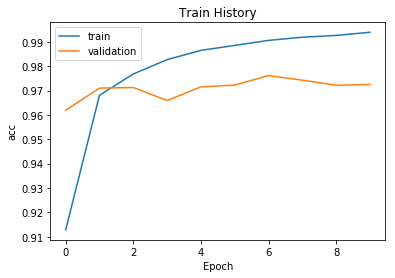

In [33]:
show_train_history(train_history,'acc','val_acc')

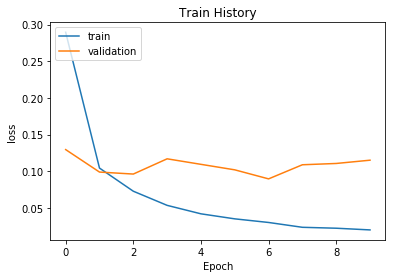

In [34]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [35]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 39us/step

accuracy= 0.9747


### Answer

試著加上一或二層隱藏層，並嘗試幾種不同的神經元數量組合，有趣的是，準確率反而不如完全沒有隱藏層的範例程式。